# Wine quality data analysis

End-to-end data analysis of wine quality data-set

Languages used:
- Python
- Spark
- R
- SQL

Overview:
- Data Import
- Data wrangling
- Exploring dataset
- Modeling
- Conclusion

## Data Import

In [0]:
%r
library(SparkR)

data_r <- read.df("/FileStore/Day16_wine_quality.csv", source = "csv", header="true")

display(data_r)
data_r <- as.data.frame(data_r)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
6.2,0.32,0.16,7,0.045,30,136,0.9949,3.18,0.47,9.6,6
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11,6


In [0]:
%r 
#detaching the package due to data type conflicts
#detach("package:SparkR", unload=TRUE)

In [0]:
%r 
head(data_r)

fixed acidity volatile acidity citric acid residual sugar chlorides
1 7 0.27 0.36 20.7 0.045
2 6.3 0.3 0.34 1.6 0.049
3 8.1 0.28 0.4 6.9 0.05
4 7.2 0.23 0.32 8.5 0.058
5 7.2 0.23 0.32 8.5 0.058
6 8.1 0.28 0.4 6.9 0.05
 free sulfur dioxide total sulfur dioxide density pH sulphates alcohol
1 45 170 1.001 3 0.45 8.8
2 14 132 0.994 3.3 0.49 9.5
3 30 97 0.9951 3.26 0.44 10.1
4 47 186 0.9956 3.19 0.4 9.9
5 47 186 0.9956 3.19 0.4 9.9
6 30 97 0.9951 3.26 0.44 10.1
 quality
1 6
2 6
3 6
4 6
5 6
6 6

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data_py = pd.read_csv("/dbfs/FileStore/Day16_wine_quality.csv", sep=',')
data_py.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 fixed acidity 4898 non-null float64
 1 volatile acidity 4898 non-null float64
 2 citric acid 4898 non-null float64
 3 residual sugar 4898 non-null float64
 4 chlorides 4898 non-null float64
 5 free sulfur dioxide 4898 non-null float64
 6 total sulfur dioxide 4898 non-null float64
 7 density 4898 non-null float64
 8 pH 4898 non-null float64
 9 sulphates 4898 non-null float64
 10 alcohol 4898 non-null float64
 11 quality 4898 non-null int64 
dtypes: float64(11), int64(1)
memory usage: 459.3 KB

## Data Wrangling

In [0]:
data_py.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Check the the data (15 rows)

In [0]:
data_py.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


Check for the duplicates and drop them

In [0]:
sum(data_py.duplicated())
data_py.drop_duplicates(inplace=True)

Check the rows with missing values and drop them

In [0]:
data_py.isnull().sum(axis=0)
data_py.dropna(axis=0, how='any', inplace=True)

Fill in the missing value with mean

In [0]:
data_py.fillna(0, inplace=True)
data_py['quality'].fillna(data_py['quality'].mean(), inplace=True)
data_py.apply(lambda x: x.fillna(x.mean(), inplace=True), axis=0)

Out[21]: fixed acidity None
volatile acidity None
citric acid None
residual sugar None
chlorides None
free sulfur dioxide None
total sulfur dioxide None
density None
pH None
sulphates None
alcohol None
quality None
dtype: object

Finding outliers with Interquartile rang  (IQR) -  also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In [0]:
Q1 = data_py.quantile(0.25)
Q3 = data_py.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity 1.00000
volatile acidity 0.12000
citric acid 0.12000
residual sugar 7.30000
chlorides 0.01500
free sulfur dioxide 22.00000
total sulfur dioxide 60.00000
density 0.00409
pH 0.20000
sulphates 0.14000
alcohol 1.90000
quality 1.00000
dtype: float64

In [0]:

data_py2 = data_py[~((data_py < (Q1 - 1.5 * IQR)) |(data_py > (Q3 + 1.5 * IQR))).any(axis=1)]
#print(data_py2.shape)
print(data_py2 < (Q1 - 1.5 * IQR)) |(data_py2 > (Q3 + 1.5 * IQR))

fixed acidity volatile acidity citric acid ... sulphates alcohol quality
1 False False False ... False False False
2 False False False ... False False False
3 False False False ... False False False
6 False False False ... False False False
9 False False False ... False False False
... ... ... ... ... ... ... ...
4893 False False False ... False False False
4894 False False False ... False False False
4895 False False False ... False False False
4896 False False False ... False False False
4897 False False False ... False False False

[3131 rows x 12 columns]

--------------------------------------------------------------------------- 
 TypeError Traceback (most recent call last)
 /databricks/python/lib/python3.7/site-packages/pandas/core/ops/array_ops.py in na_logical_op (x, y, op) 
 273 # (xint or xbool) and (yint or bool) 
 --> 274 result = op ( x , y ) 
 275 except TypeError : 

 /databricks/python/lib/python3.7/site-packages/pandas/core/ops/roperator.py in ror_ (left, right) 
 55 def ror_ ( left , right ) : 
 ---> 56 return operator . or_ ( right , left ) 
 57 

 TypeError : unsupported operand type(s) for |: 'NoneType' and 'bool'

During handling of the above exception, another exception occurred:

 ValueError Traceback (most recent call last)
 /databricks/python/lib/python3.7/site-packages/pandas/core/ops/array_ops.py in na_logical_op (x, y, op) 
 287 try : 
 --> 288 result = libops . scalar_binop ( x , y , op ) 
 289 except (

 pandas/_libs/ops.pyx in pandas._libs.ops.scalar_binop () 

 ValueError : Buffer has wrong number of dimensions (expected 1, got 2)

During handling of the above exception, another exception occurred:

 TypeError Traceback (most recent call last)
 <command-2816859480965468> in <module> 
 1 data_py2 = data_py [ ~ ( ( data_py < ( Q1 - 1.5 * IQR ) ) | ( data_py > ( Q3 + 1.5 * IQR ) ) ) . any ( axis = 1 ) ] 
 2 #print(data_py2.shape) 
 ----> 3 print ( data_py2 < ( Q1 - 1.5 * IQR ) ) | ( data_py2 > ( Q3 + 1.5 * IQR ) ) 

 /databricks/python/lib/python3.7/site-packages/pandas/core/ops/__init__.py in f (self, other, axis, level, fill_value) 
 717 self = self . fillna ( fill_value ) 
 718 
 --> 719 new_data = dispatch_to_series ( self , other , op , str_rep ) 
 720 return self . _construct_result ( new_data ) 
 721 

 /databricks/python/lib/python3.7/site-packages/pandas/core/ops/__init__.py in dispatch_to_series (left, right, func, str_rep, axis) 
 376 # Get the appropriate array-op to apply to each block's values. 
 377 array_op = get_array_op ( func , str_rep = str_rep ) 
 --> 378 bm = left . _data . apply ( array_op , right = right ) 
 379 return type ( left ) ( bm ) 
 380 

 /databricks/python/lib/python3.7/site-packages/pandas/core/internals/managers.py in apply (self, f, filter, **kwargs) 
 438 
 439 if callable ( f ) : 
 --> 440 applied = b . apply ( f , ** kwargs ) 
 441 else : 
 442 applied = getattr ( b , f ) ( ** kwargs ) 

 /databricks/python/lib/python3.7/site-packages/pandas/core/internals/blocks.py in apply (self, func, **kwargs) 
 388 """
 389 with np . errstate ( all = "ignore" ) : 
 --> 390 result = func ( self . values , ** kwargs ) 
 391 
 392 if is_extension_array_dtype ( result ) and result . ndim > 1 : 

 /databricks/python/lib/python3.7/site-packages/pandas/core/ops/array_ops.py in logical_op (left, right, op) 
 364 filler = fill_int if is_self_int_dtype and is_other_int_dtype else fill_bool
 365 
 --> 366 res_values = na_logical_op ( lvalues , rvalues , op ) 
 367 res_values = filler ( res_values ) # type: ignore 
 368 

 /databricks/python/lib/python3.7/site-packages/pandas/core/ops/array_ops.py in na_logical_op (x, y, op) 
 296 typ = type ( y ) . __name__
 297 raise TypeError(
 --> 298 f"Cannot perform '{op.__name__}' with a dtyped [{x.dtype}] array " 
 299 f"and scalar of type [{typ}]" 
 300 )

 TypeError : Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

## Exploring Dataset

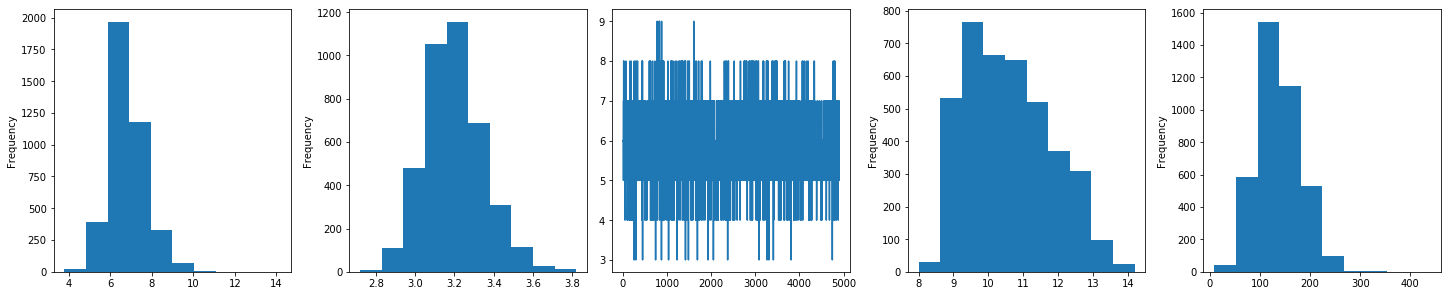

In [0]:
fig, axs = plt.subplots(1,5,figsize=(20,4),constrained_layout=True)

data_py['fixed acidity'].plot(kind='hist', ax=axs[0])
data_py['pH'].plot(kind='hist', ax=axs[1])
data_py['quality'].plot(kind='line', ax=axs[2])
data_py['alcohol'].plot(kind='hist', ax=axs[3])
data_py['total sulfur dioxide'].plot(kind='hist', ax=axs[4])

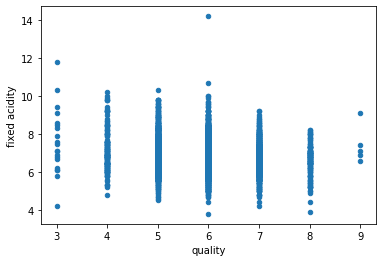

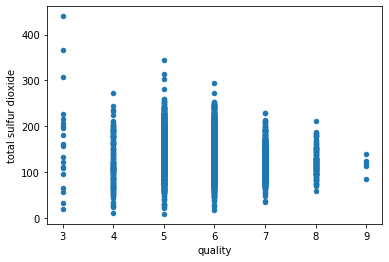

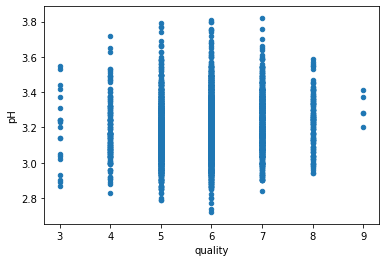

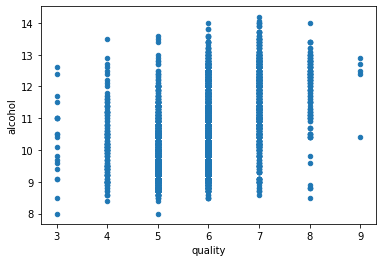

In [0]:
#fig, axs = plt.subplots(1,4)
data_py.plot(x='quality', y='fixed acidity', kind='scatter') 
data_py.plot(x='quality', y='total sulfur dioxide', kind='scatter') 
data_py.plot(x='quality', y='pH', kind='scatter')
data_py.plot(x='quality', y='alcohol', kind='scatter') 

Plotting counts by quality

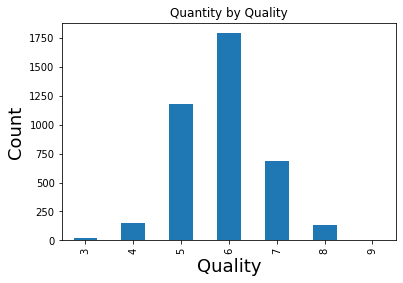

In [0]:
counts = data_py.groupby(['quality']).count()['pH']  # why pH? The values for all columns are the same...coz it's a count! 
counts.plot(kind='bar', title='Quantity by Quality')
plt.xlabel('Quality', fontsize=18) 
plt.ylabel('Count', fontsize=18)

And the quality with Ph (using boxplots)

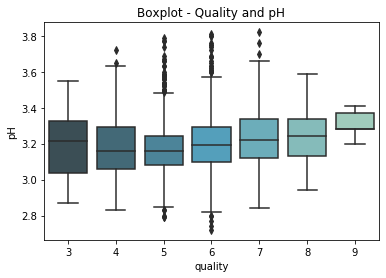

In [0]:
sns.boxplot(x='quality',y='pH',data=data_py,palette='GnBu_d')
plt.title("Boxplot - Quality and pH")
plt.show()

And quality with Alcohol level

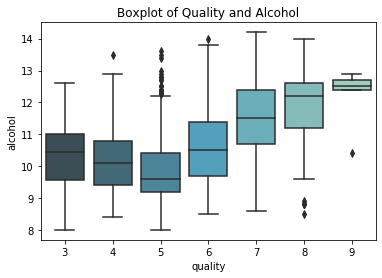

In [0]:
ax = sns.boxplot(x='quality',y='alcohol',data=data_py,palette='GnBu_d')
plt.title("Boxplot of Quality and Alcohol")
plt.show()

And quality with fixed acidity

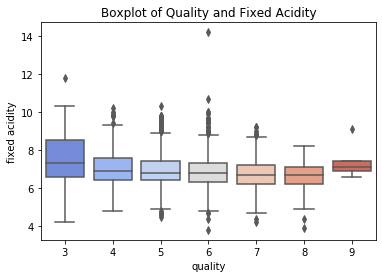

In [0]:
sns.boxplot(x="quality",y="fixed acidity",data=data_py,palette="coolwarm")
plt.title("Boxplot of Quality and Fixed Acidity")
plt.show()

Get the Correlations with Quality

In [0]:
data_py.corr()['quality']

Out[50]: fixed acidity -0.124636
volatile acidity -0.190678
citric acid 0.007065
residual sugar -0.117339
chlorides -0.217739
free sulfur dioxide 0.010507
total sulfur dioxide -0.183356
density -0.337805
pH 0.123829
sulphates 0.053200
alcohol 0.462869
quality 1.000000
Name: quality, dtype: float64

Or plot the correlations using heatmap

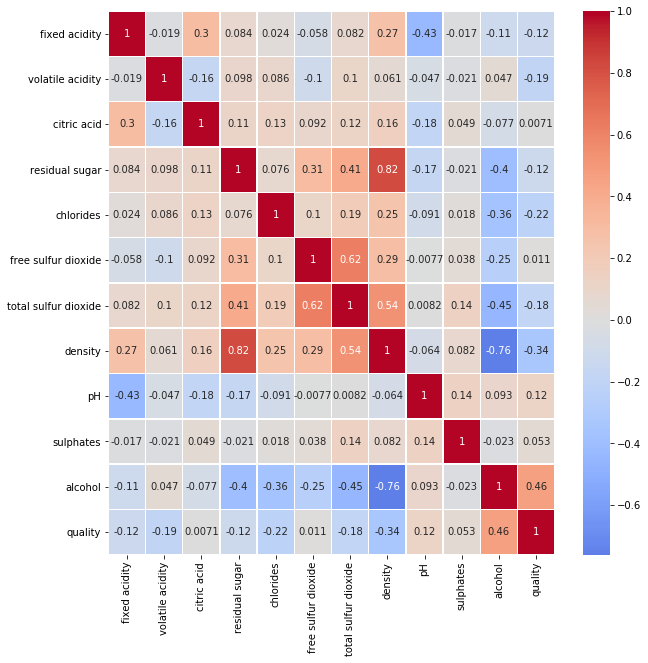

In [0]:
plt.figure(figsize=(10,10))
sns.heatmap(data_py.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

## Modeling

Importing all the needed packages

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Choosing the Y variable and the rest of dataset; Y variable is the Quality variable

In [0]:
X = data_py.iloc[:,:11].values
Y = data_py.iloc[:,-1].values

In [0]:
#Splitting the dataset into training and test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [0]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

## Model fitting

Fitting using logistic regression

In [0]:
#Fitting Logistic Regression into dataset
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,Y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(Y_test,lr_pred)
print("The accuracy of  LogisticRegression is:",accuracy_score(Y_test, lr_pred))

The accuracy of LogisticRegression is: 0.4722502522704339

In [0]:
#Making confusion matrix
print(lr_cm)

[[ 0 0 3 4 0 0 0]
 [ 0 3 11 19 0 0 0]
 [ 0 1 97 201 7 0 0]
 [ 0 0 72 353 20 0 0]
 [ 0 0 9 146 15 0 0]
 [ 0 0 1 25 3 0 0]
 [ 0 0 0 0 1 0 0]]

In [0]:
#Fitting SVM into dataset
cl = SVC(kernel="rbf")
cl.fit(X_train,Y_train)
svm_pred=cl.predict(X_test)
svm_cm = confusion_matrix(Y_test,cl.predict(X_test))
print("The accuracy of  SVM is:",accuracy_score(Y_test, svm_pred))

The accuracy of SVM is: 0.48335015136226034

In [0]:
#Making confusion matrix
print(svm_cm)

[[ 0 0 2 5 0 0 0]
 [ 0 4 13 16 0 0 0]
 [ 0 3 106 195 2 0 0]
 [ 0 0 75 364 6 0 0]
 [ 0 0 8 157 5 0 0]
 [ 0 0 2 25 2 0 0]
 [ 0 0 0 1 0 0 0]]

In [0]:
#Fitting Randomforest into dataset
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,Y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(Y_test,rdf_pred)
print("The accuracy of RandomForestClassifier is:",accuracy_score(rdf_pred,Y_test))

The accuracy of RandomForestClassifier is: 0.42885973763874874

In [0]:
#Making confusion matrix
print(rdf_cm)

[[ 0 0 3 4 0 0 0]
 [ 1 3 16 10 2 1 0]
 [ 0 7 131 154 14 0 0]
 [ 1 8 120 257 55 4 0]
 [ 0 1 26 109 34 0 0]
 [ 0 1 6 14 8 0 0]
 [ 0 0 0 1 0 0 0]]

In [0]:
#Fitting KNN into dataset
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
knn_pred=knn.predict(X_test)
knn_cm=confusion_matrix(Y_test,knn_pred)
print("The accuracy of KNeighborsClassifier is:",accuracy_score(knn_pred,Y_test))

The accuracy of KNeighborsClassifier is: 0.39455095862764883

In [0]:
#Making confusion matrix
print(knn_cm)

[[ 0 1 4 2 0 0 0]
 [ 1 6 11 13 2 0 0]
 [ 0 21 139 128 18 0 0]
 [ 3 34 138 218 51 1 0]
 [ 1 7 44 87 28 3 0]
 [ 0 2 6 14 7 0 0]
 [ 0 0 0 0 1 0 0]]

In [0]:
#Fitting Naive bayes into dataset
gaussian=GaussianNB()
gaussian.fit(X_train,Y_train)
bayes_pred=gaussian.predict(X_test)
bayes_cm=confusion_matrix(Y_test,bayes_pred)
print("The accuracy of naives bayes is:",accuracy_score(bayes_pred,Y_test))

The accuracy of naives bayes is: 0.46316851664984865

In [0]:
#Making confusion matrix
print(bayes_cm)

[[ 0 0 3 4 0 0 0]
 [ 1 4 11 17 0 0 0]
 [ 1 11 78 216 0 0 0]
 [ 2 2 63 372 6 0 0]
 [ 1 2 9 153 5 0 0]
 [ 0 0 2 26 1 0 0]
 [ 0 0 0 1 0 0 0]]